<a href="https://colab.research.google.com/github/AndLen/222ass1/blob/master/AIML131_Example_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dtreeviz

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz

%matplotlib inline

In [11]:
# Toy dataset for Exam Pass Prediction

data = {

    'Study Hours':      [6, 19, 14, 10, 7, 1, 15, 9, 12, 18, 18, 8, 18, 14, 14, 2, 15, 6, 10, 10,
                        7, 11, 14, 13, 7, 14, 13, 14, 5, 7, 19, 12, 15, 5, 14, 0, 5, 7, 5, 11,
                        9, 13, 19, 16, 18, 1, 18, 15, 12, 25, 0],
    'Attendance (%)':   [56, 44, 87, 90, 45, 38, 85, 41, 51, 93, 97, 68, 15, 35, 19, 77, 32, 95, 89, 68,
                        69, 35, 87, 89, 63, 67, 81, 97, 62, 32, 32, 38, 99, 54, 19, 55, 47, 27, 98, 66,
                        40, 33, 44, 41, 24, 47, 37, 14, 44, 36, 100],
    'Passed':           ['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
                        'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
                        'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes','No']
}




# Create a DataFrame
df = pd.DataFrame(data)
df.head()  # Display the first few rows of the dataset


,Study Hours,Attendance (%),Passed
0,6,56,No
1,19,44,Yes
2,14,87,Yes
3,10,90,Yes
4,7,45,No


In [10]:
# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
df['Passed'] = label_encoder.fit_transform(df['Passed'])

df.head()


,Study Hours,Attendance (%),Passed
0,6,56,0
1,19,44,1
2,14,87,1
3,10,90,1
4,7,45,0


In [5]:
# Features and target variable
X = df[['Study Hours', 'Attendance (%)']]
y = df['Passed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the training and testing sets
X_train.head(), X_test.head()


(    Study Hours  Attendance (%)
 8            12              51
 49           25              36
 6            15              85
 47           15              14
 4             7              45,
     Study Hours  Attendance (%)
 43           16              41
 40            9              40
 46           18              37
 12           18              15
 24            7              63)

In [6]:
# Initialize and train the decision tree classifier
model = DecisionTreeClassifier(random_state=42,max_depth=3)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


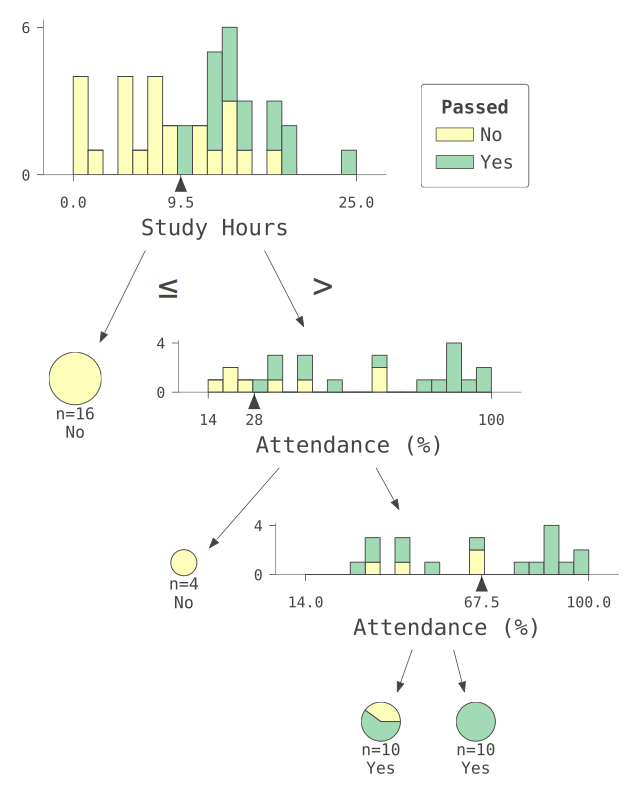

In [7]:
# Visualize the decision tree using dtreeviz
viz_model = dtreeviz.model(model,
                  X_train,
                  y_train,
                  target_name='Passed',
                  feature_names=['Study Hours', 'Attendance (%)'],
                  class_names=['No','Yes'])

viz_model.view(fontname='monospace',scale=2.5)


In [8]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Display the predictions alongside the actual values
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pred_df


,Actual,Predicted
43,1,1
40,0,0
46,1,1
12,0,0
24,0,0
31,0,1
17,0,0
32,1,1
3,1,1
30,0,1


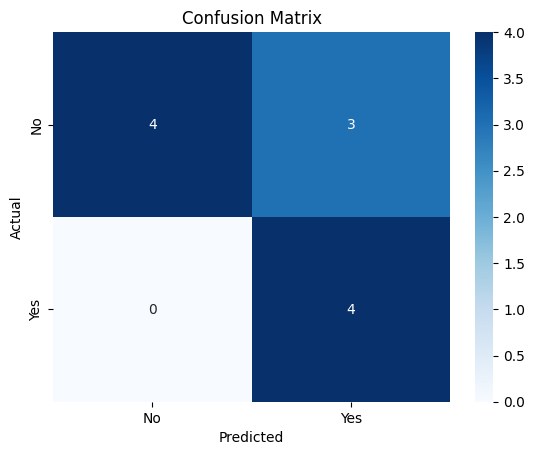

In [9]:
# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
